# 📘 Kombinert analyse av Frost API og NILU API

Denne notebooken undersøker hvordan ulike værforhold påvirker luftkvaliteten i Norge, med særlig fokus på temperatur og vindhastighet i sammenheng med konsentrasjoner av NO₂ (nitrogendioksid) og O₃ (ozon).

Vi kombinerer tidligere presenterte målinger fra to miljøedatakilder:
- **Frost API** - værdata fra Meterologisk institutt 
- **NILU API** - luftkvalitetsdata fra NOrsk institutt for luftforskning.

Formålet er å analysere hvordan meterologiske faktorer kan påvirke luftforurensningen, og om det finnes tydelige mønstre eller korrelasjoner som kan visualiseres og tolkes. Til slutt gjennomføres en prediktiv analyse for å modellere og forutsi luftkvalitet basert på værdata og sesongmønstre. 

#### Mål for analysen:
- Kombinere meteorlogiske og luftkvalitetsdata 
- Visualisere samvariasjon mellom temperatur og NO₂ over tid
- Utføre korrelasjonsanalyse mellom:
    - Temperatur og O₃ 
    - Vindhastighet og NO₂
- Utføre prediktiv analyse med lineær og ikke-lineær modell 
- Tolke resultatene i lys av kjente meteorologiske og miljømessige forhold


----------------------------------------------------------------

#### Legge til filbane

For å kunne importere egne moduler fra `src`-mappen, legger vi til denne mappen i systemets søkesti (`sys.path`).  
Dette gjør det mulig å bruke funksjoner og klasser vi har definert i prosjektets kildekode.


In [2]:
#Filbane 
import sys
sys.path.insert(0, '../../src/') 

## Visualisering av sammenhengen mellom luftkvalitet og temperatur

#### Introduksjon til datasettet og visualiseringen

Denne koden leser inn to miljødatakilder:
- Meteorologiske data (temperatur) fra Meteorologisk institutt (Frost API)
- Luftkvalitetsmålinger (NO₂) fra Norsk institutt for luftforskning (NILU)

Begge datasettene inneholder en `Dato`-kolonne og kombineres gjennom en **indre join**, slik at kun datoer med data i begge kilder benyttes. Den resulterende datastrukturen benyttes til å visualisere **temperatur** og **NO₂-konsentrasjon** over tid i én felles graf med to y-akser.

#### Formål og nytteverdi

Denne typen visualisering gir en oversikt over hvordan temperatur og luftforurensning (her representert ved nitrogendioksid – NO₂) utvikler seg over tid, og legger til rette for å identifisere mulige sammenhenger mellom meteorologiske forhold og luftkvalitet.

Spesielt er det nyttig å undersøke:
- Sesongvariasjoner i luftforurensning
- Samvariasjon mellom kaldt vær og forhøyede NO₂-nivåer
- Trender og avvik som kan indikere behov for tiltak eller videre analyser

#### Hvorfor er NO₂ ofte høyere ved lavere temperaturer?

Ved kalde temperaturer – spesielt om vinteren – forekommer det ofte meteorologiske fenomener som **temperaturinversjon**. Dette skjer når et kaldt luftlag nær bakken fanges under et varmere luftlag høyere oppe. Inversjonen fungerer som et **lokk** som hindrer vertikal sirkulasjon i atmosfæren, og forurensning fra biltrafikk og annen forbrenning får ikke anledning til å spre seg eller løftes bort.

Konsekvensene av dette inkluderer:
- Akkumulering av NO₂ og andre forurensende stoffer nær bakkenivå
- Dårligere luftkvalitet i befolkningstette områder, spesielt i byer og dalfører
- Økt helserisiko, spesielt for utsatte grupper som barn, eldre og personer med luftveissykdommer

Ved å sammenligne NO₂ og temperatur visuelt i én graf, blir det lettere å identifisere slike mønstre og forstå **hvordan værforhold påvirker luftforurensningen**.

#### Fordeler ved valgt visualiseringsmetode

- Bruk av to y-akser muliggjør en **intuitiv og presis sammenligning** mellom to dataserier med ulik skala.
- Tidslinjeformatet gir god **oversikt over utvikling og sesongvariasjon**.
- Bruk av farge og interaktive elementer gjør grafen **lett å lese og tolke**, også for ikke-eksperter.

Denne typen fremstilling er et nyttig verktøy for både forskere, forvaltningsorgan og beslutningstakere som arbeider med klima, byplanlegging eller folkehelse.


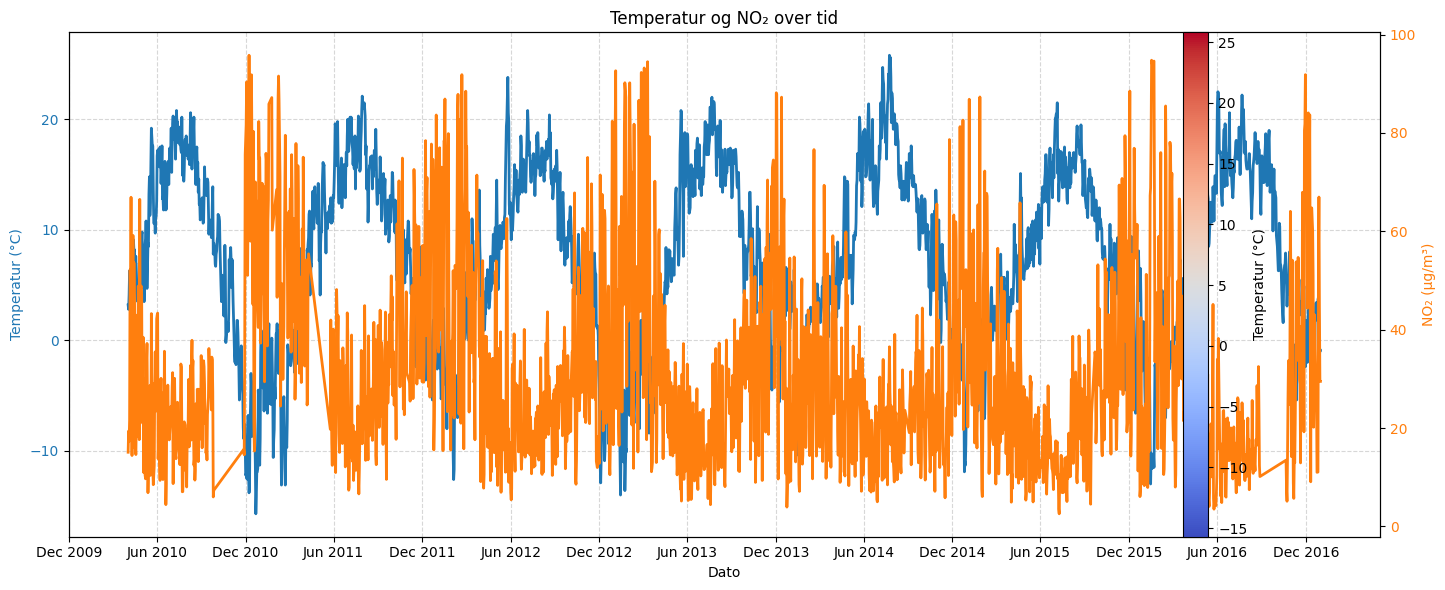

In [3]:
from combined.combined_analysis import load_merge_and_plot_no2_temp
load_merge_and_plot_no2_temp()


---
## Videre analyse: Temperatur og O₃, Vindhastighet og NO₂

Vi går videre med en korrelasjonsanalyse for å undersøke hvorvidt det finnes statistiske sammenhenger mellom:
- Temperatur og ozon (O₃) 
- Vindhastighet og nitrogendioksid (NO₂) 

Målet er å kvantifisere og visualisere hvordan disse meteorologiske faktorene påvirker luftkvaliteten. 

##### <u>Korrelasjonsanalyse med Pearson-koeffisienten</u>:

Resultater fra beregningen viser:

| Variabelpar              | Pearson-korrelasjon |
|--------------------------|---------------------|
| Temperatur og O₃         | 0,315               |
| Vindhastighet og NO₂     | -0,56               |


##### <u>Tolkning</u>:

En korrelasjon på **0,315** tilsier en moderat positiv sammenheng mellom temperatur og ozon-nivå. Funnet tilsier at ozon dannes lettere på varme dager. Årsaken til dette er at ozon ved bakkeplan dannes gjennom fotokjemiske reaksjoner drevet av sollys. På solrike, varmedager, spesielt i urbane områder med mye trafikk, kan altså bakkenært ozon nå høye konsentrasjoner. 

En korrelasjon på **-0,56** tilsier en moderat til sterk negativ sammenheng. Funnet tilsier at vind bidrar til å spre forurensning (spesielt NO2) og det er derfor lavere konsentrasjoner lokalet ved høy vindhastighet. 

*Disse funnene er i tråd med forventede meteorologiske effekter.*

##### <u>Visualisering</u>:

Scatterplottet viser korrelassjonsfunnene visuelt:
- Scatterplottet for temperatur og ozon viser en tendens til høyere ozon-nivå ved høyere temperatur. 
- Scatterplottet for vindhastighet og NO2 viser en negativ trend hvor høyere vind gir lavere NO2. 
- De røde trendlinjene bidrar til å tydeliggjøre analysen.


Korrelasjon mellom Temperatur og Verdi_O3: 0.31583731259360703
Korrelasjon mellom Vindhastighet og Verdi_NO2: -0.5600926726837975


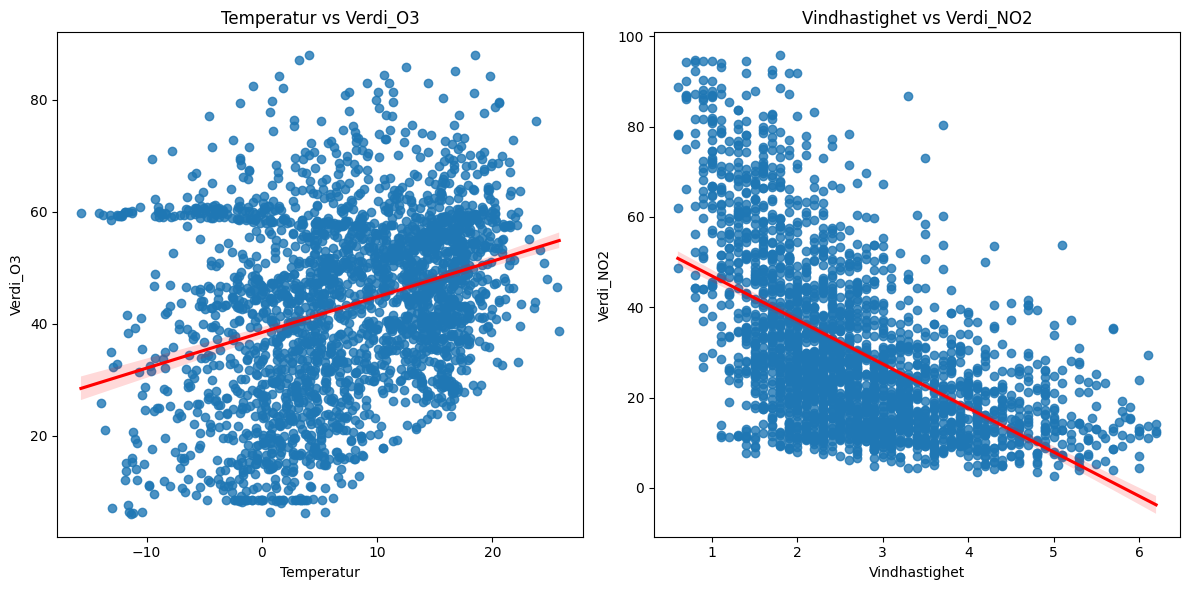

In [4]:
# Beregner og visualiserer korrelasjonen mellom ulike værdata  
from SQL.sql_analysis import analyze_frost_nilu
analyze_frost_nilu()

## Oppsummering funn 

Den kombinerte analysen viser at det finnes målbare sammenhenger mellom vær og luftkvalitet:
- **Kaldt vær** (inversjoner) fører til opphopning av NO₂
- **Høye temperaturer** gir økt ozonproduksjon
- **Vind** spiller en viktig rolle i å redusere lokal luftforurensning

Kombinasjonen av datakilder og visualisering gir verdifull innsikt som kan bidra til bedre luftkvalitetsvarsling, planlegging av tiltak, og informert politikk innen miljø og helse.

---


# 🔍 Prediktiv analyse 

Denne delen fokuserer på å forutsi fremtidige miljøforhold gjennom **lineær regresjon** og **maskinlæringsmodellen LightGBM**. 

Vi bruker et kombinert datasett fra NILU og Frost API (koblingspunkt: dato). Datasettene brukt er fra `analyzed_data` slik at de allerede er transformert med standarisering og evt. Yeo-Johnson-metoden, og renset for manglende verdier. Dette gjør datasettet velegnet for maskinlæring og regresjonsanalyse, siden det har forbedret skjevhetsfordeling og skalert varians.

Før modelltreningen måtte vi bestemme hvilke variabler som skulle fungere som uavhengige (forklarende) og hvilke som skulle være avhengige (det vi ønsker å forutsi). I denne analysen valgte vi å bruke værdata – som temperatur, nedbør og vindhastighet – som uavhengige variabler. Luftkvalitetsmålingene (NO₂, O₃ og SO₂) ble definert som avhengige variabler. Med andre ord forsøkte vi å predikere nivåene av luftforurensning basert på ulike værforhold.



#### Kombinere datatasettene
Vi kombinerer værdata fra Frost API og luftdata fra NILU API med `kombinere_df`-funksjonen.  

Ved å "flate ut" datasettet får vi:
- Ett samlet datasett med én rad per dato
- Enklere analyse og modellering
- Mulighet til å studere sammenhenger mellom vær og luftkvalitet

Dette gir en struktur som er godt egnet for videre analyser og prediksjon.

In [5]:

from combined.combined_analysis import combine_df
data=combine_df("../../data/analyzed_data/frostAPI_analyzed_data.json", 
                  "../../data/analyzed_data/niluAPI_analyzed_data.json", 'Dato')
print(data.head())

        Dato  Stasjon    Nedbør  Temperatur  Vindhastighet  \
0 2010-04-02        0  1.623820   -0.531761       0.202376   
1 2010-04-03        0  1.267506   -0.582103      -0.341805   
2 2010-04-04        0 -0.818391   -0.418491       0.837255   
3 2010-04-05        0 -0.818391   -0.141610      -0.251108   
4 2010-04-06        0 -0.818391   -0.506590      -1.067380   

   Interpolert_Nedbør  Interpolert_Temperatur  Interpolert_Vindhastighet  \
0               False                   False                      False   
1               False                   False                      False   
2               False                   False                      False   
3               False                   False                      False   
4               False                   False                      False   

   Dekningsgrad_NO2  Dekningsgrad_O3  Dekningsgrad_SO2  Verdi_NO2_Trans  \
0             100.0            100.0             100.0        -0.827405   
1             100.0 

### Prediktiv modellering med Lineær Regresjon og LightGBM 

Videre importerer vi maskinlæringsmodeller for å predikere luftkvalitet basert på værdata og tidsbaserte trekk.

**Valgte modeller:**

- `LinearRegression` - en enkel lineær modell som brukes som baseline. 
- `LGBMRegressor` - en kraftig, ikke-lineær modlel som håndterer komplekse relasjoner godt.  

#### Bruk av sesongbaserte trekk 📅

I tillegg til værdata (temperatur, nedbør, vind) legger vi til **tidsbaserte variabler** som fanger opp sesongmønstre og periodiske endringer i luftkvalitet.

#### Forklaring av variablene:

- **`måned`**: Fanger opp forskjeller mellom årstidene (f.eks. mer forurensning om vinteren).
- **`ukedag`**: Skiller mellom hverdager og helg – trafikk og aktivitet varierer.
- **`dag_i_året`**: Grunnlag for å modellere sesonger kontinuerlig.
- **`sin_dag` / `cos_dag`**: Konverterer dagnummer til sykliske verdier slik at modellen ser at dag 1 og dag 365 henger sammen.

#### Hvorfor det er viktig:
- Tid påvirker luftkvalitet sterkt.
- Modellen kan fange opp mønstre som gjentar seg ukentlig og årlig.
- Det gir mer nøyaktige og robuste prediksjoner.

In [6]:
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
sys.path.insert(0, '../src/')
from combined.combined_analysis import prediction_with_futurevalues
features = ["Nedbør", "Temperatur", "Vindhastighet", "måned", "ukedag", "sin_dag", "cos_dag"]

## 📈 Visualisering og analyse av prediksjoner 

I denne seksjonen benytter vi de importerte maskinlæringsmodellene til å forutsi fremtidige nivåer av luftforurensning - nærmere bestemt NO₂, O₃ og SO₂.

`prediksjon_med_fremtidige_verdier()` tar inn følgende:

- Et datasett `df` som inneholder historiske målinger. 
- En målvariabel som vi ønsker å predikere (eks "`Verdi_NO2_Trans`)
- En liste over inputvariabler (eks temperatur, nedbør og sesongbaserte variabler (`sin_dag, cos_dag`))
- En modell (`LGBMRegressor()` eller `LinearRegression()`)
- Antall fremtidige dager vi ønsker å predikere (eks 500)
- En dekningsgrad-variabel for å ta hensyn til datakvalitet

Etter at modellen er trent, predikeres fremtidige verdier dag for dag basert på mønstre i eksisterende data og sesonginformasjon. Resultatene visualiseres som tidsseriegrafer, hvor både historiske og predikerte verdier vises. 

##### Trenings- og testdeling

Vi bruker `train_test_split` fra `sklearn.model_selection` for å dele datasettet:

- **80 % treningsdata**: brukes til å lære sammenhenger mellom vær, tid og luftkvalitet
- **20 % testdata**: brukes til å evaluere hvor godt modellen generaliserer til nye, usette data

Dette er viktig for å sikre at modellen ikke bare "lærer utenat", men faktisk klarer å forutsi fremtidige verdier.

---

##### Evalueringsmetoder 📈

For å vurdere modellens ytelse benytter vi:

- **R² (R-squared / forklaringsgrad)**  
  Måler hvor stor andel av variasjonen i målvariabelen (f.eks. NO₂) som forklares av modellen.  
  ➤ Verdi nær 1 betyr god forklaring.

- **MAE (Mean Absolute Error)**  
  Gjennomsnittet av absoluttavvikene mellom faktiske og predikerte verdier.  
  ➤ Lav MAE betyr at modellen treffer nær de faktiske verdiene.

Ved å kombinere disse to målene får vi en god forståelse av både **nøyaktighet** og **forklaringsevne** i modellen.

##### Sammenligning av modellprestasjoner:

| Modelltype         | NO₂ (R² / MSE)     | SO₂ (R² / MSE)     | O₃ (R² / MSE)      |
|--------------------|--------------------|---------------------|---------------------|
| LGBMRegressor()    | 0.5942 / 0.4818     | -1.1059 / 0.8523     | -0.0677 / 0.9221     |
| LinearRegression() | 0.5817 / 0.4966     | -0.7804 / 0.7206     | 0.1036 / 0.7742      |


**NO₂**:

- LGBMRegressor har litt høyere R² (0.5942) enn LinearRegression (0.5817), og litt lavere MSE (0.4818 - 0.4966). Det betyr at LGBM-modellen forklarer noe mer av variansen i dataene og har noe bedre prediksjonsnøyaktighet. Rundt **59 % av NO₂-variansen kan forklares kun med vær og tid** – det viser at været har stor påvirkning. 

**SO₂:**

- Begge modellene har negative R²-verdier, noe som indikerer at modellene forklarer dataene dårligere enn en enkel gjennomsnittsmodell (baseline). LinearRegression presterer noe bedre enn LGBM med R² = -0.7804 mot -1.1059, og lavere MSE (0.7206 vs. 0.8523). Her er begge modellene svake.

**O₃:**

- **LinearRegression** har positiv R² (**0.1036**) og lavere MSE (**0.7742**) enn **LGBM**, som har negativ R² (**-0.0677**) og høyere MSE (**0.9221**). Dette betyr at LinearRegression forklarer noe av variasjonen i O₃, mens LGBM presterer dårligere enn å bare gjette snittet. O₃-nivåene ser ut til å ha en enklere, mer lineær sammenheng med værdata.

##### Drøfting av visualiseringen av prediksjoner:

Visulasjonene viser at ...

 - Prediksjonen fra **LGBMRegressor** ser mer "hakkete" ut.  Dette skyldes at LGBM er en ensemble-modell basert på beslutningstrær som deler data inn i biter. Derfor blir prediksjonene ofte stykkevis konstante innenfor hver del, noe som gir et hakkete mønster i grafen. Dette kan gi god tilpasning til treningsdata, men mindre jevnhet i trendene.
 - Prediksjonen fra **LinearRegression** fremstår smooth og kontinuerlig. Lineær regresjon forsøker å finne en enkel lineær sammenheng mellom input og output, og prediksjonene blir derfor en jevnere linje som endrer seg gradvis. Dette gir et mer intuitivt og forståelig bilde av trender, men kan mangle fleksibiliteten til å fange opp komplekse ikke-lineære mønstre.

#### Visualisering av modellen 📈
Visualiseringen nedenfor viser ulike deler av datasettet og modellens prediksjoner:

##### Treningsdata: Rosa linje 
##### Ekte testdata: Rød linje 
##### Predikert testdata: Grå stiplet linje
##### Fremtidig (predikert) data: Blå stiplet linje
Grafen er interaktiv – du kan zoome inn, panorere og utforske ulike områder og tidspunkter.
Dette er laget med Plotly, som gir gode verktøy for interaktiv datavisualisering.


In [7]:

prediction_with_futurevalues(df=data, target_col="Verdi_NO2_Trans", features=features, model_object=LGBMRegressor(), 
                                  num_days=500, coverage=data["Dekningsgrad_NO2"])         
prediction_with_futurevalues(df=data, target_col="Verdi_NO2_Trans", features=features, model_object=LinearRegression(), 
                                  num_days=500, coverage=data["Dekningsgrad_NO2"])



🔍 Evaluering av modellen 'LGBMRegressor' for 'Verdi_NO2_Trans':
- R²-score: 0.6020
- MSE: 0.4725



🔍 Evaluering av modellen 'LinearRegression' for 'Verdi_NO2_Trans':
- R²-score: 0.5817
- MSE: 0.4966


In [8]:
prediction_with_futurevalues(df=data, target_col="Verdi_SO2_Trans", features=features, model_object=LGBMRegressor(), 
                                  num_days=500, coverage=data["Dekningsgrad_SO2"])         
prediction_with_futurevalues(df=data, target_col="Verdi_SO2_Trans", features=features, model_object=LinearRegression(), 
                                  num_days=500, coverage=data["Dekningsgrad_SO2"])


🔍 Evaluering av modellen 'LGBMRegressor' for 'Verdi_SO2_Trans':
- R²-score: -1.1162
- MSE: 0.8565



🔍 Evaluering av modellen 'LinearRegression' for 'Verdi_SO2_Trans':
- R²-score: -0.7804
- MSE: 0.7206


In [9]:
prediction_with_futurevalues(df=data, target_col="Verdi_O3_Trans", features=features, model_object=LGBMRegressor(), 
                                  num_days=500, coverage=data["Dekningsgrad_O3"])         
prediction_with_futurevalues(df=data, target_col="Verdi_O3_Trans", features=features, model_object=LinearRegression(), 
                                  num_days=500, coverage=data["Dekningsgrad_O3"])


🔍 Evaluering av modellen 'LGBMRegressor' for 'Verdi_O3_Trans':
- R²-score: -0.0615
- MSE: 0.9168



🔍 Evaluering av modellen 'LinearRegression' for 'Verdi_O3_Trans':
- R²-score: 0.1036
- MSE: 0.7742


---
## Modellkoeffisienter for luftkvalitetsdata i Oslo

Videre har vi undersøkt hvilke faktorer som **isolert** påvirker nivåene av de tre luftforurensende gassene (NO₂, O₃ og SO₂). For å gjøre dette har vi brukt lineær regresjon og transformere verdier av disse variablene, med et sett meteorologiske og sesongmessige forklaringsvariabler. 

### Metode

- Vi har benyttet funksjonen `vis_koeffisienter_linærmodell` som trener en lineær regresjonsmodell for hver av målvariablene (`Verdi_NO2_Trans`, `Verdi_O3_Trans`, `Verdi_SO2_Trans`).
- Forklaringsvariablene inkluderer meteorologiske data som nedbør, temperatur og vindhastighet, samt sesong- og tidselementer som måned, ukedag, og sesongfunksjoner `sin_dag` og `cos_dag`.
- Funksjonen legger til sesongvariabler basert på dato, trener modellen og plottet koeffisientene for hver forklaringsvariabel, slik at vi kan se styrken og retningen på effekten hver variabel har på luftkvalitetsnivåene.


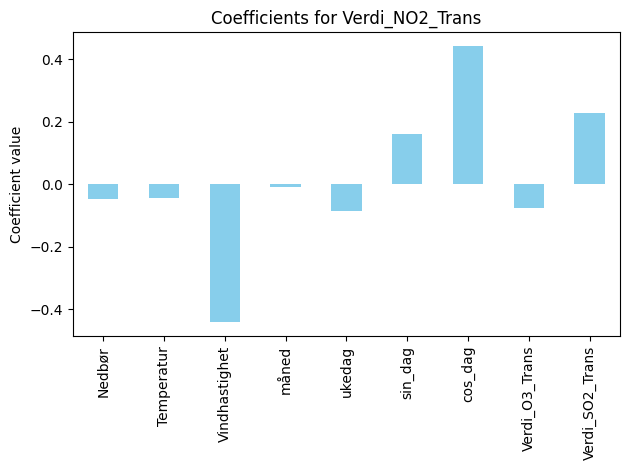

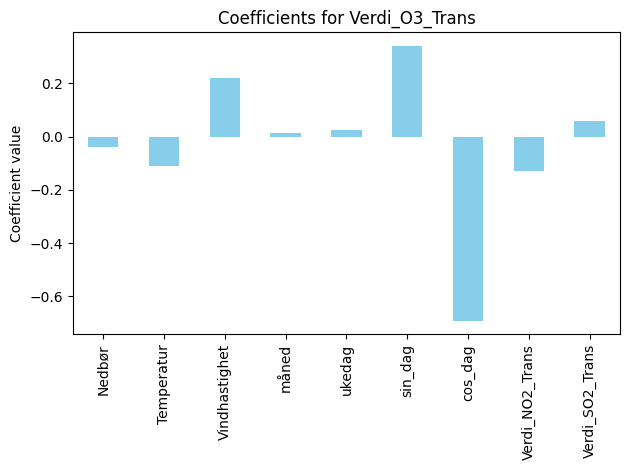

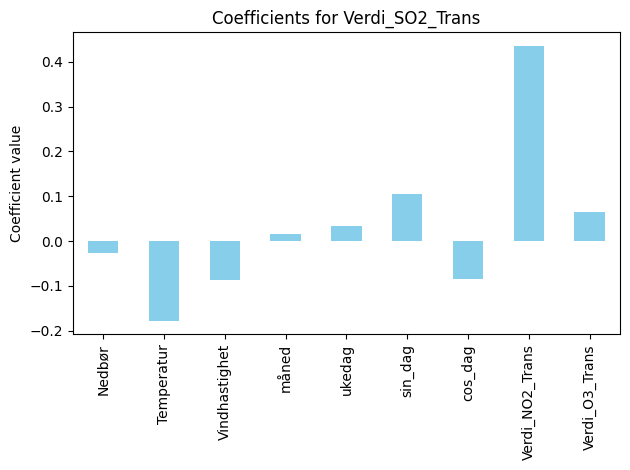

In [10]:
from combined.combined_analysis import plot_linear_model_coefficients
features = ["Nedbør", "Temperatur", "Vindhastighet", "måned", "ukedag", "sin_dag", 
            "cos_dag","Verdi_NO2_Trans", "Verdi_O3_Trans", "Verdi_SO2_Trans"]
plot_linear_model_coefficients(data, features, ["Verdi_NO2_Trans", "Verdi_O3_Trans", "Verdi_SO2_Trans"])

## Resultater og tolkning

### NO₂ (nitrogendioksid)
- **Vinterøkning:** Koeffisientene viser at NO₂ øker tydelig om vinteren, noe som stemmer med kjente sesongmønstre for denne gassen.
- **Sammenheng med SO₂:** NO₂ har en positiv samvariasjon med SO₂, som indikerer at disse forurensningene kan ha felles kilder eller påvirkes av samme forhold.
- **Vind:** Økt vindhastighet reduserer NO₂-nivåene, noe som er forventet siden vind sprer forurensning.
- **Andre variabler:** Temperatur, ozon, nedbør og ukedag har mindre tydelige effekter på NO₂.

### O₃ (ozon)
- **Sterk sesongvariasjon:** Ozon øker betydelig om våren og sommeren, og dette er den dominerende forklaringsfaktoren i modellen.
- **Begrenset effekt av andre faktorer:** Utover sesongen har de meteorologiske variablene mindre påvirkning på ozonnivåene.

### SO₂ (svoveldioksid)
- **Sterk sammenheng med NO₂:** SO₂ følger ofte NO₂-nivåene, noe som kan skyldes felles utslippskilder.
- **Sesongvariasjoner:** Økning i SO₂ er knyttet til sesongvariabelen `sin_dag`, men den reduseres også om vinteren og ved høy temperatur og vind.
- **Svake positive effekter:** O₃ og ukedag har en svak positiv effekt på SO₂.

### Sesongvariabelen `cos_dag`
- Har en positiv effekt på NO₂ (mer NO₂ om vinteren).
- Har negativ effekt på SO₂ og O₃ (disse reduseres om vinteren).


## Analyse

Denne koeffisientanalysen bekrefter kjente mønstre i luftkvalitetsdata for Oslo:

- NO₂ og SO₂ øker i vintermånedene (sannsynligvis på grunn av økt bruk av fossile brensler til oppvarming og stillestående luftforhold som reduserer spredning).
- Ozon øker i vår- og sommermånedene, noe som stemmer med at ozondannelse er drevet av sollys og varme.
- Vind reduserer NO₂ og SO₂ ved å spre forurensningene.
- Samvariasjonene mellom NO₂ og SO₂ tyder på at disse ofte stammer fra lignende kilder eller påvirkes av samme meteorologiske faktorer.

Samlet sett gir denne modellen innsikt i hvordan vær og sesong påvirker luftkvaliteten i Oslo, og kan brukes til bedre å forstå og forutsi variasjoner i forurensningsnivåer.

---

## Polynomregresjon for luftkvalitetsvariabler i Oslo

Her er det også undersøkt hvordan ulike forklaringsvariabler påvirker nivåene av NO₂, SO₂ og O₃ i Oslo. Polynomregresjon kan brukes for å identifisere *både* lineære og ikke-lineære sammenhenger mellom variablene. 

 `vis_polynomreregresjon_for_feature` gjør følgende:

 - Tar inn et datasett og to kolonnenavn
 - Lager regresjonsmodeller med polynomgrader 1, 2 og 3
 - Plotter sammenhengen mellom feature og target for hver grad
 - Viser hvor godt modellene forklarer variasjon i dataene (R²-visning i legend)

#### Om de tre gradene:
- Grad 1: Rett linje – enkel, direkte sammenheng
- Grad 2: Buet linje – fanger topp- eller bunnpunkt
- Grad 3: Bølgete linje – fanger mer komplekse mønstre
Jo høyere grad, desto mer fleksibel modell – men også mer følsom for støy.

In [11]:
from combined.combined_analysis import visualize_polynomial_fit_for_feature

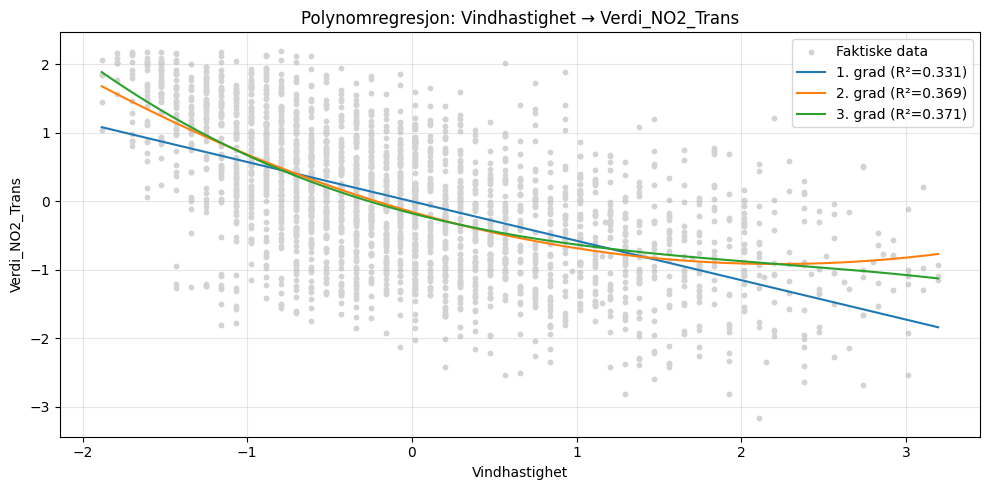

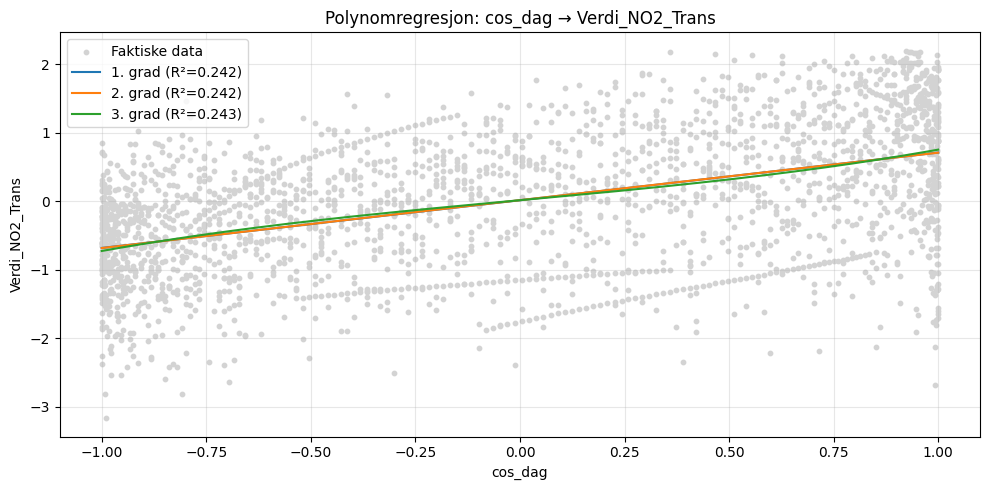

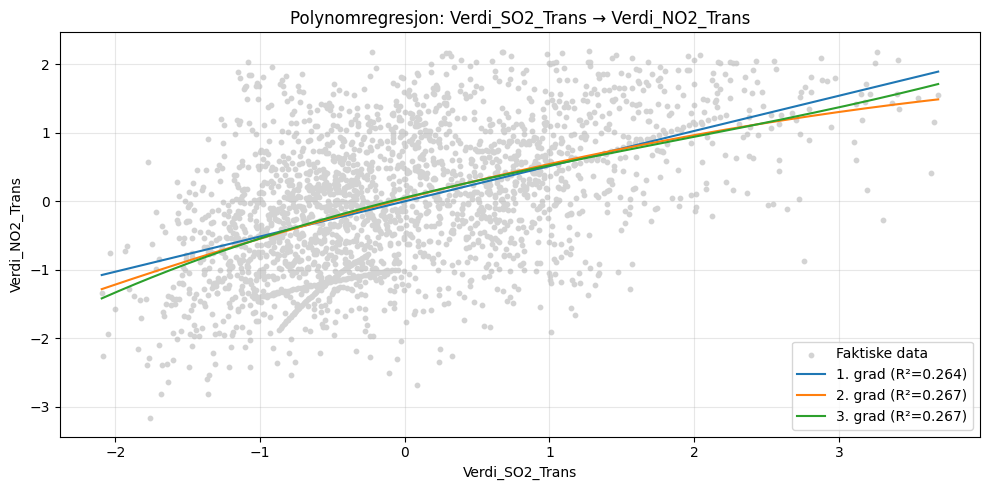

In [12]:
visualize_polynomial_fit_for_feature(df=data,feature="Vindhastighet", target_col="Verdi_NO2_Trans")
visualize_polynomial_fit_for_feature(df=data,feature="cos_dag", target_col="Verdi_NO2_Trans")
visualize_polynomial_fit_for_feature(df=data,feature="Verdi_SO2_Trans", target_col="Verdi_NO2_Trans")

## NO₂ – Polynomregresjon

Basert på tidligere analyser er **Vindhastighet**, **cos_dag** og **SO₂** valgt som forklaringsvariabler for NO₂.



#### Vindhastighet → NO₂
- **Sammenheng:** Sterk negativ.
- **R²:** Øker fra **0.33** til **0.37** ved bruk av høyere grads polynom.
- **Tolkning:** Forholdet er delvis **ikke-lineært**, men totalt sett negativt.



#### cos_dag → NO₂
- **Sammenheng:** Tydelig positiv.
- **R²:** Rundt **0.24** for alle grader → hovedsakelig **lineært forhold**.
- **Tolkning:** Støtter at **NO₂ øker vinterstid** (cos_dag representerer årstid).



#### SO₂ → NO₂
- **Sammenheng:** Klar positiv.
- **R²:** Ca. **0.26** for alle grader.
- **Tolkning:** Stabil og **lineær** sammenheng, liten gevinst fra komplekse modeller.



### Konklusjon
- **Vindhastighet** har sterk negativ effekt, og kan modelleres bedre med et **ikke-lineært uttrykk**.
- **cos_dag** og **SO₂** har **lineær og positiv** påvirkning på NO₂.
- NO₂ ser dermed ut til å **øke vinterstid** (cos_dag) og ved **høyere SO₂**, men **reduseres ved økt vind**.

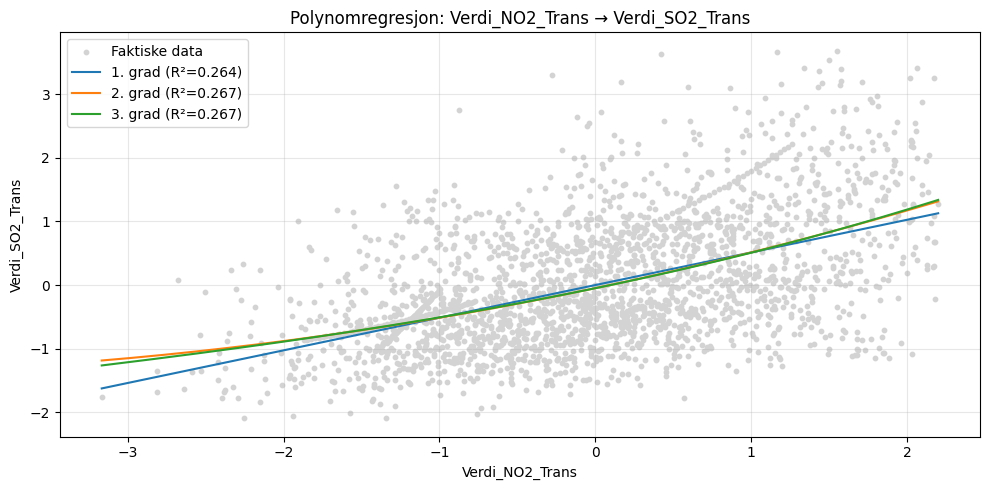

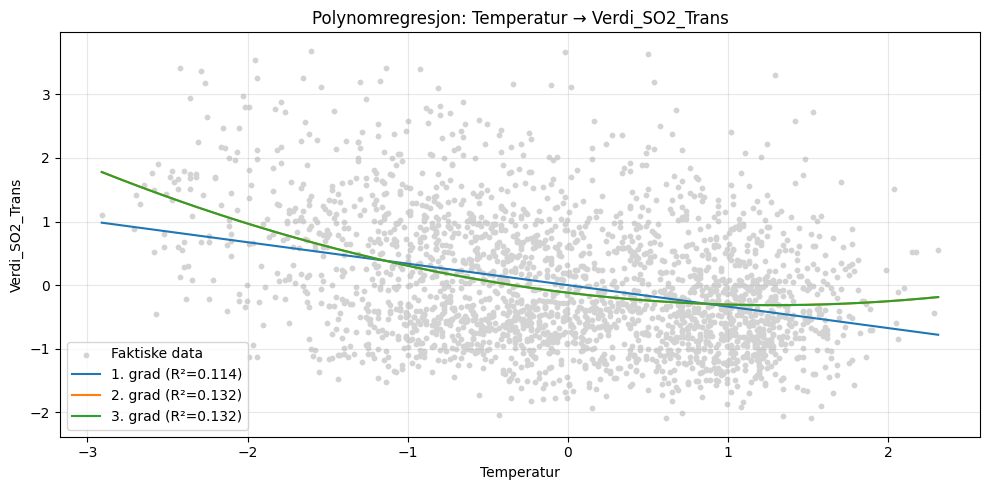

In [13]:
visualize_polynomial_fit_for_feature(df=data,feature="Verdi_NO2_Trans", target_col="Verdi_SO2_Trans")
visualize_polynomial_fit_for_feature(df=data,feature="Temperatur", target_col="Verdi_SO2_Trans")

## SO₂ – Polynomregresjon

Basert på tidligere analyser er **NO₂** og **Temperatur** valgt som sentrale forklaringsvariabler for SO₂.


#### NO₂ → SO₂
- **Sammenheng:** Klar positiv og lineær.
- **R²:** Stabilt rundt **0.26–0.27** for alle polynomgrader.
- **Tolkning:** Lite forbedring ved høyere grad → forholdet er i hovedsak **lineært**.

#### Temperatur → SO₂
- **Sammenheng:** Svak negativ og delvis **ikke-lineær**.
- **R²:** Øker fra **0.11** til **0.13** med høyere grad.
- **Tolkning:** Svak kurveformet effekt, men **lav forklaringskraft** totalt sett.


### Konklusjon
- **SO₂ påvirkes mest av NO₂**, med et **nær lineært forhold**.
- **Temperatur** gir **svak prediksjon**, med en delvis ikke-lineær effekt.

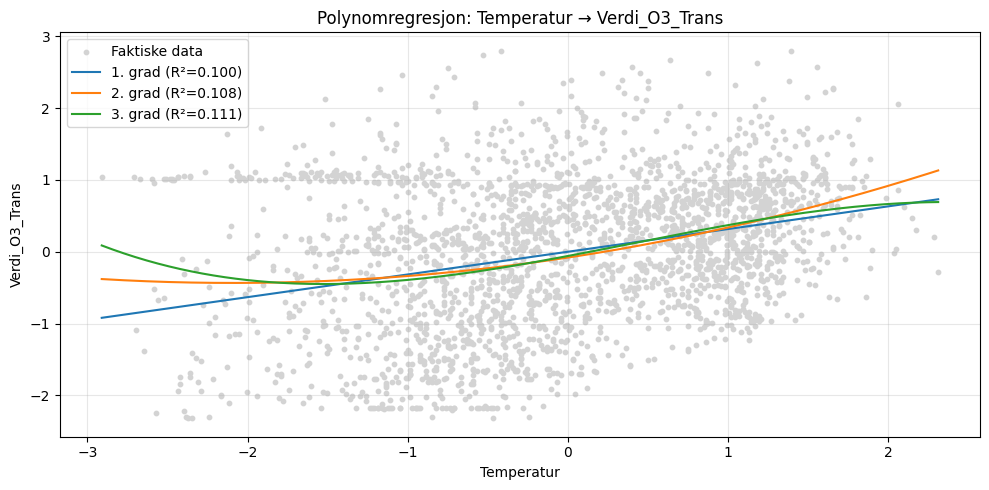

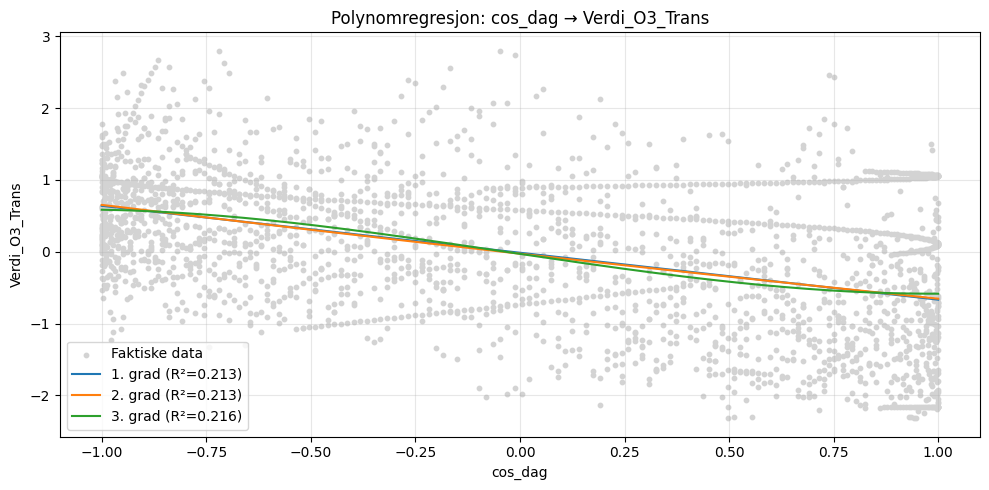

In [14]:
visualize_polynomial_fit_for_feature(df=data,feature="Temperatur", target_col="Verdi_O3_Trans")
visualize_polynomial_fit_for_feature(df=data,feature="cos_dag", target_col="Verdi_O3_Trans")

## O₃ – Polynomregresjon

Basert på tidligere analyser ble **Temperatur** og **cos_dag** valgt som forklaringsvariabler for O₃.

#### Temperatur → O₃
- **Sammenheng:** Svak positiv.
- **R²:** Øker noe fra **0.099** til **0.111** med høyere grad.
- **Tolkning:** Antyder en **svak ikke-lineær effekt**, men med **begrenset forklaringsevne**.

#### cos_dag → O₃
- **Sammenheng:** Tydelig negativ.
- **R²:** Ligger stabilt rundt **0.21**, med svak forbedring ved økende grad.
- **Tolkning:** Stabil og **delvis ikke-lineær** sesongeffekt.

### Konklusjon
- **cos_dag** er best egnet for å modellere **sesongvariasjoner** i ozon.
- **Temperatur** har en viss effekt, men gir **lav forklaringskraft**.
- Støtter hypotesen om **lavere ozonverdier vinterstid**, hovedsakelig fanget opp av **cos_dag**.



## Generell tolkning av analysen

Denne analysen undersøker hvordan ulike faktorer påvirker luftkvaliteten i Oslo, med særlig fokus på nivåene av **NO₂**, **SO₂** og **O₃**. Vi har brukt både enkle og avanserte modeller for å forstå sammenhenger i dataene og gjøre prediksjoner.

### Modellene

- **Linear Regression**  
  Gir enkle og jevne prediksjoner. Den er lett å tolke og fanger overordnede trender, men har begrenset evne til å fange opp komplekse mønstre.

- **LGBMRegressor**  
  En ensemblemodell basert på beslutningstrær. Den gir mer «hakkete» prediksjoner fordi den deler opp dataene i segmenter. Modellen er fleksibel og fanger detaljer godt, men resultatene kan være mindre intuitive.

### Visualiseringene

Interaktive grafer (laget med **Plotly**) viser:

- **Treningsdata**: Rosa linje  
- **Faktisk testdata**: Rød linje  
- **Predikert testdata**: Grå stiplet linje  
- **Fremtidige prediksjoner**: Blå stiplet linje  

Grafene er interaktive og gir mulighet for zooming og utforsking av ulike deler av datasettet.

### Visualisering av isolerte elementer

Vi ser også et stolpediagram som viser **påvirkningskraften til hver enkelt værvariabel** isolert for hver av gassene (NO₂, SO₂ og O₃). Dette gir en oversikt over hvilke faktorer som har størst effekt på nivåene av hver gass, når de vurderes uavhengig av andre variabler.


### Utforsking med polynomregresjon

For å analysere sammenhenger mellom enkeltvariabler og forurensningsnivåer er det brukt **polynomregresjon** med grader 1, 2 og 3.

- **Grad 1**: Rett linje – viser enkel lineær sammenheng  
- **Grad 2**: Buet linje – fanger topp- eller bunnpunkt  
- **Grad 3**: Bølgete kurve – fanger mer komplekse mønstre

Dette gir innsikt i om forholdet mellom variabler er enkelt eller krever mer avanserte modeller.

### Konklusjon

Analysen gir et helhetlig bilde av hvordan ulike faktorer påvirker luftkvaliteten i Oslo, med fokus på nivåene av NO₂, SO₂ og O₃. 

Vi ser at enkle modeller som lineær regresjon gir god oversikt over generelle trender og er lette å tolke, mens mer avanserte modeller som LGBM gir bedre tilpasning og høyere presisjon – særlig ved mer komplekse eller ikke-lineære sammenhenger.

Visualiseringene, både av prediksjoner og enkeltfaktorers påvirkning, gjør det lettere å forstå hvilke vær- og miljøvariabler som spiller størst rolle for hver enkelt gass.

Polynomregresjonen viser at enkelte variabler påvirker gassnivåene på ikke-lineære måter, noe som understreker behovet for fleksible modeller i luftkvalitetsanalyse.

**Totalt sett viser analysen at både modellvalg og god tolkning av variablenes effekt er avgjørende for å forstå og forutsi luftforurensning i bymiljø.**




[⬅️ Forrige: NILU-analyse](../niluAPI/niluAPI.ipynb)